<a href="https://colab.research.google.com/github/isatkm22/ProjetoRegressaoT3/blob/main/Projeto_Restic36.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
data = pd.read_csv('/content/top_insta_influencers_data.csv')

print(data.head())
print(data.isnull().sum())




   rank channel_info  influence_score  posts followers avg_likes  \
0     1    cristiano               92   3.3k    475.8m      8.7m   
1     2  kyliejenner               91   6.9k    366.2m      8.3m   
2     3     leomessi               90  0.89k    357.3m      6.8m   
3     4  selenagomez               93   1.8k    342.7m      6.2m   
4     5      therock               91   6.8k    334.1m      1.9m   

  60_day_eng_rate new_post_avg_like total_likes        country  
0           1.39%              6.5m       29.0b          Spain  
1           1.62%              5.9m       57.4b  United States  
2           1.24%              4.4m        6.0b            NaN  
3           0.97%              3.3m       11.5b  United States  
4           0.20%            665.3k       12.5b  United States  
rank                  0
channel_info          0
influence_score       0
posts                 0
followers             0
avg_likes             0
60_day_eng_rate       0
new_post_avg_like     0
total_lik

# Nova seção

In [ ]:
# Converter colunas com 'k', 'm' e '%' para numéricas
def convert_to_number(value):
    if isinstance(value, str):
        value = value.replace('k', '').replace('m', '').replace('%', '').replace(',', '.').replace('b', '')
        try:
            return float(value)
        except ValueError:
            return float('nan')
    try:
        return float(value)
    except (TypeError, ValueError):
        return float('nan')

# Aplicar conversão nas colunas
columns_to_convert = ['posts', 'followers', 'avg_likes', 'new_post_avg_like', 'total_likes', '60_day_eng_rate']
for col in columns_to_convert:
    data[col] = data[col].apply(convert_to_number)

# Verificar os dados após a conversão
data.head()


,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.30,475.8,8.7,1.39,6.5,29.0,Spain
1,2,kyliejenner,91,6.90,366.2,8.3,1.62,5.9,57.4,United States
2,3,leomessi,90,0.89,357.3,6.8,1.24,4.4,6.0,NaN
3,4,selenagomez,93,1.80,342.7,6.2,0.97,3.3,11.5,United States
4,5,therock,91,6.80,334.1,1.9,0.20,665.3,12.5,United States


             rank  influence_score       posts  followers   avg_likes  \
count  200.000000       200.000000  200.000000  200.00000  200.000000   
mean   100.500000        81.820000    3.499850   77.40950  222.170000   
std     57.879185         8.878159    3.475828   73.68727  297.405035   
min      1.000000        22.000000    0.010000   32.80000    1.000000   
25%     50.750000        80.000000    0.947500   40.00000    1.900000   
50%    100.500000        84.000000    2.100000   50.05000    6.000000   
75%    150.250000        86.000000    5.025000   68.90000  404.025000   
max    200.000000        93.000000   17.500000  475.80000  996.200000   

       60_day_eng_rate  new_post_avg_like  total_likes  
count       199.000000          200.00000   200.000000  
mean          1.902010          237.10450   142.132000  
std           3.329719          278.11938   276.127439  
min           0.010000            0.00000     1.000000  
25%           0.410000            3.20000     2.000000  


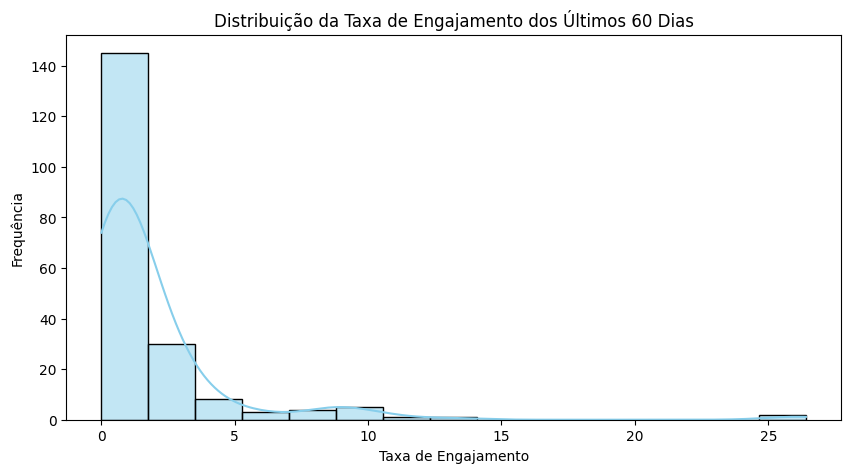

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estatísticas Descritivas
print(data.describe())

# Distribuição da Taxa de Engajamento
plt.figure(figsize=(10, 5))
sns.histplot(data['60_day_eng_rate'], kde=True, bins=15, color='skyblue')
plt.title('Distribuição da Taxa de Engajamento dos Últimos 60 Dias')
plt.xlabel('Taxa de Engajamento')
plt.ylabel('Frequência')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# 1. Separar variáveis dependente e independentes
# '60_day_eng_rate' é a variável dependente, e as outras são independentes
X = data[['followers', 'avg_likes', 'new_post_avg_like']]  # Variáveis independentes
y = data['60_day_eng_rate']  # Variável dependente (taxa de engajamento)

# 2. Dividir dados em conjuntos de treinamento e teste (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# *** Aplicar a função convert_to_number às colunas relevantes de X_train e X_test ***
for col in ['followers', 'avg_likes', 'new_post_avg_like']:
    X_train[col] = X_train[col].apply(convert_to_number)
    X_test[col] = X_test[col].apply(convert_to_number)


X_train, y_train = X_train[~y_train.isna()], y_train[~y_train.isna()]

X_test, y_test = X_test[~y_test.isna()], y_test[~y_test.isna()]

# 3. Normalizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Treinar o Modelo de Regressão Linear
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# 5. Fazer previsões
y_pred = model.predict(X_test_scaled)

# 6. Avaliação do Modelo
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Erro Médio Quadrático (MSE):", mse)
print("Erro Médio Absoluto (MAE):", mae)
print("Coeficiente de Determinação (R²):", r2)

# 7. Coeficientes do Modelo
print("Coeficientes das Variáveis Independentes:", model.coef_)
print("Intercepto do Modelo:", model.intercept_)


Erro Médio Quadrático (MSE): 5.612995115052071
Erro Médio Absoluto (MAE): 1.7537033332246281
Coeficiente de Determinação (R²): 0.11387355512010022
Coeficientes das Variáveis Independentes: [-0.6248247  -0.92348849 -0.59262113]
Intercepto do Modelo: 1.868616352201258


In [ ]:
import re

# Função para limpar caracteres não numéricos e converter em float
def clean_numeric(column):
    return column.replace(r'[^\d.]', '', regex=True).astype(float)

# Aplicando a função de limpeza nas colunas relevantes
data['followers'] = clean_numeric(data['followers'])
data['avg_likes'] = clean_numeric(data['avg_likes'])
data['new_post_avg_like'] = clean_numeric(data['new_post_avg_like'])

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Função para limpar caracteres não numéricos e converter em float
def clean_numeric(column):
    return column.replace(r'[^\d.]', '', regex=True).astype(float)

# Aplicando a função de limpeza nas colunas relevantes
data['followers'] = clean_numeric(data['followers'])
data['avg_likes'] = clean_numeric(data['avg_likes'])
data['new_post_avg_like'] = clean_numeric(data['new_post_avg_like'])

# Função para remover o sinal de porcentagem e converter para float
def convert_to_number(x):
    try:
        return float(str(x).strip('%')) / 100
    except (ValueError, AttributeError):
        return np.nan

# Convertendo '60_day_eng_rate' em número
data['60_day_eng_rate'] = data['60_day_eng_rate'].apply(convert_to_number)

# Removendo linhas com valores NaN em qualquer uma das colunas
data.dropna(subset=['followers', 'avg_likes', 'new_post_avg_like', '60_day_eng_rate'], inplace=True)

# Separando X e y
X = data[['followers', 'avg_likes', 'new_post_avg_like']].values  # Variáveis independentes
y = data['60_day_eng_rate'].values  # Variável dependente

class LinearRegressionGD:
    def __init__(self, learning_rate=0.01, epochs=1000, regularization=None, alpha=0.1):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.regularization = regularization  # 'lasso' for L1 or 'ridge' for L2
        self.alpha = alpha  # Regularization strength
        self.weights = None
        self.bias = None
        self.scaler = None

    def fit(self, X, y):
        # Normalizar os dados
        self.scaler = StandardScaler()
        X = self.scaler.fit_transform(X)

        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradiente Descendente com regularização
        for _ in range(self.epochs):
            y_predicted = np.dot(X, self.weights) + self.bias
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Regularização Lasso (L1)
            if self.regularization == 'lasso':
                dw += self.alpha * np.sign(self.weights)

            # Regularização Ridge (L2)
            elif self.regularization == 'ridge':
                dw += self.alpha * self.weights

            # Atualização dos parâmetros
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        # Normalizar os dados de entrada usando o mesmo scaler
        X = self.scaler.transform(X)
        return np.dot(X, self.weights) + self.bias

# Função para realizar Validação Cruzada
def cross_validation(model, X, y, cv=5):
    kfold = KFold(n_splits=cv, shuffle=True, random_state=42)
    errors = []

    for train_index, test_index in kfold.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        error = np.sqrt(np.mean((y_test - predictions) ** 2))
        errors.append(error)

    return np.mean(errors)

# Instanciando a classe com regularização Lasso
model = LinearRegressionGD(learning_rate=0.01, epochs=1000, regularization='lasso', alpha=0.1)

# Realizando a validação cruzada
cv_error = cross_validation(model, X, y, cv=5)
print("Erro médio de validação cruzada (RMSE) com regularização Lasso:", cv_error)

# Alterando para regularização Ridge e repetindo a validação cruzada
model = LinearRegressionGD(learning_rate=0.01, epochs=1000, regularization='ridge', alpha=0.1)
cv_error_ridge = cross_validation(model, X, y, cv=5)
print("Erro médio de validação cruzada (RMSE) com regularização Ridge:", cv_error_ridge)


Erro médio de validação cruzada (RMSE) com regularização Lasso: 0.0009081255594423345
Erro médio de validação cruzada (RMSE) com regularização Ridge: 0.0003041292103769259


Coeficientes (Pesos): [-5.52261861e-05 -7.43507717e-05 -4.98311804e-05]
Intercepto (Bias): 0.00019592279140353088


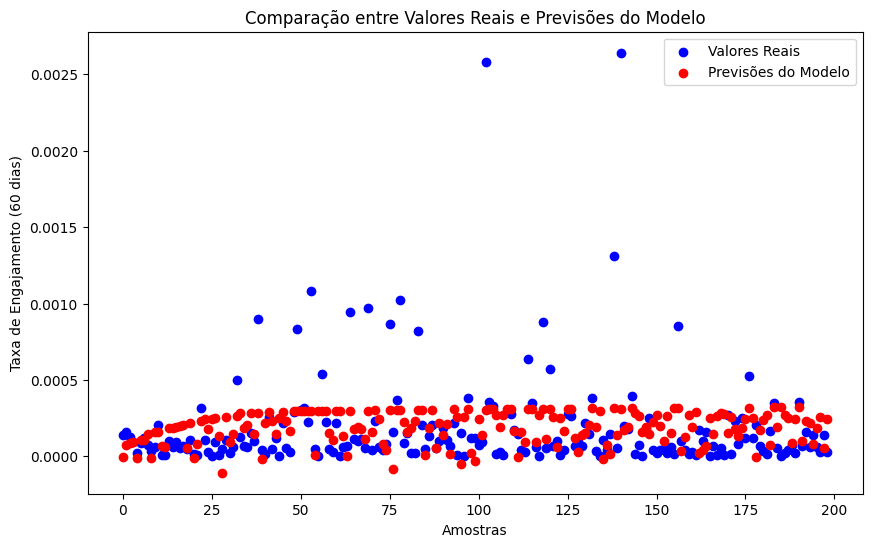

RMSE no conjunto completo: 0.0003121053857804183
R² no conjunto completo: 0.11697048893450435


In [ ]:
# 1. Interpretar os Coeficientes
print("Coeficientes (Pesos):", model.weights)
print("Intercepto (Bias):", model.bias)

# 2. Visualizar os Resultados
import matplotlib.pyplot as plt

predictions = model.predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(range(len(y)), y, color="blue", label="Valores Reais")
plt.scatter(range(len(y)), predictions, color="red", label="Previsões do Modelo")
plt.xlabel("Amostras")
plt.ylabel("Taxa de Engajamento (60 dias)")
plt.legend()
plt.title("Comparação entre Valores Reais e Previsões do Modelo")
plt.show()

# 3. Calcular Outras Métricas de Avaliação
def r2_score(y_true, y_pred):
    mean_y = np.mean(y_true)
    ss_tot = np.sum((y_true - mean_y) ** 2)
    ss_res = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_res / ss_tot)

rmse = np.sqrt(np.mean((y - predictions) ** 2))
r2 = r2_score(y, predictions)

print("RMSE no conjunto completo:", rmse)
print("R² no conjunto completo:", r2)


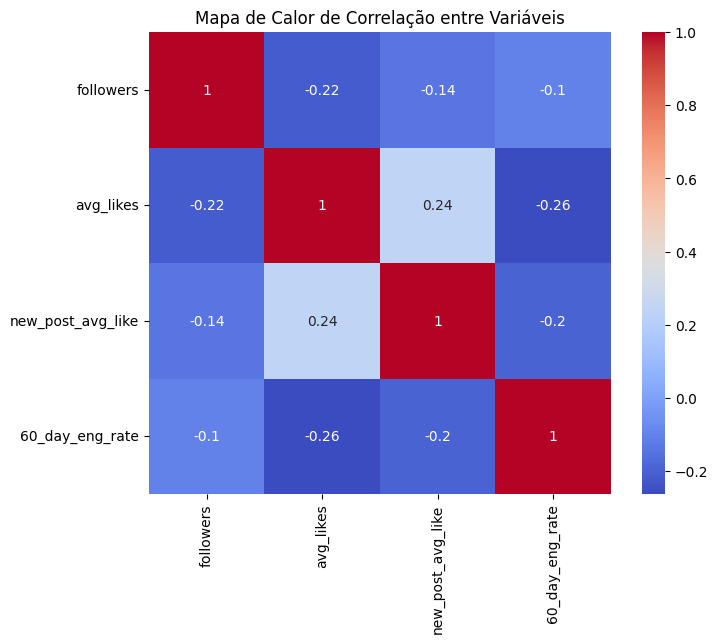

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular e plotar a matriz de correlação
corr_matrix = data[['followers', 'avg_likes', 'new_post_avg_like', '60_day_eng_rate']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title("Mapa de Calor de Correlação entre Variáveis")
plt.show()


In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

# Seleção de variáveis com base no teste F para regressão
selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X, y)

# Exibir pontuações de cada variável
print("Pontuações de Seleção de Variáveis:")
for i, col in enumerate(['followers', 'avg_likes', 'new_post_avg_like']):
    print(f"{col}: {selector.scores_[i]}")


Pontuações de Seleção de Variáveis:
followers: 2.026469547894713
avg_likes: 14.626482315783027
new_post_avg_like: 7.800784198961953


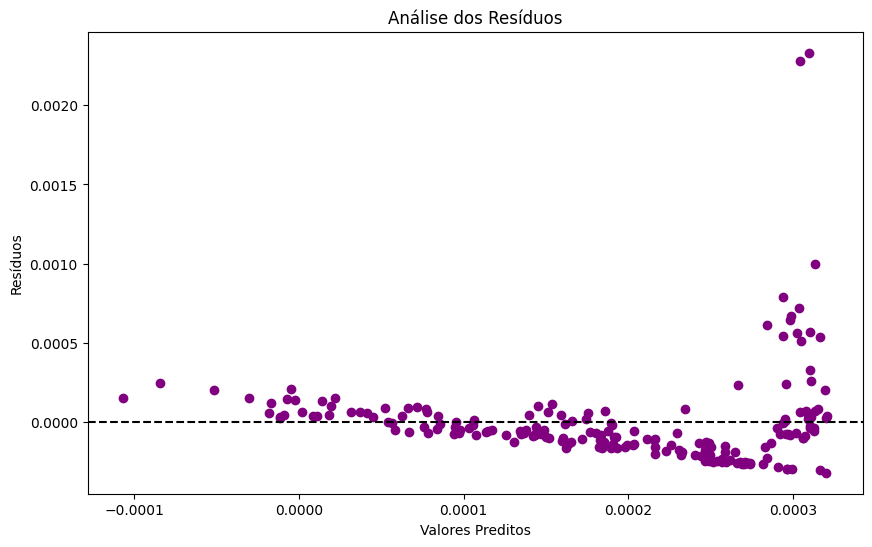

In [ ]:
residuals = y - predictions

plt.figure(figsize=(10, 6))
plt.scatter(predictions, residuals, color="purple")
plt.axhline(y=0, color="black", linestyle="--")
plt.xlabel("Valores Preditos")
plt.ylabel("Resíduos")
plt.title("Análise dos Resíduos")
plt.show()
